# Chemical Similarity

Identify working directory:

In [1]:
import os
os.getcwd()

'C:\\Users\\us16120\\Projects\\Cheminformatics'

Access RDKit

In [4]:
from rdkit import Chem

In [5]:
m = Chem.MolFromSmiles('c1nccc2n1ccc2')

In [6]:
m

In [7]:
from rdkit.Chem import AllChem

In [8]:
AllChem.Compute2DCoords(m)

0

In [9]:
print(Chem.MolToMolBlock(m))


     RDKit          2D

  9 10  0  0  0  0  0  0  0  0999 V2000
    1.5000   -1.0065    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -2.3055    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -2.3055    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000   -1.0065    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    0.2925    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    0.2925    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.2135    1.7191    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    2.6008    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2135    1.7191    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  1  0
  6  7  1  0
  7  8  2  0
  8  9  1  0
  6  1  1  0
  9  5  2  0
M  END



In [10]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

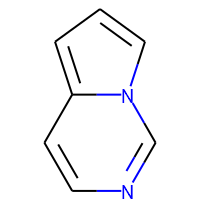

In [11]:
Draw.MolsToGridImage([m], molsPerRow = 1)

In [12]:
import gzip

In [13]:
inf = gzip.open('data/chemblntd_all.sdf.gz')

In [14]:
cmpds = Chem.ForwardSDMolSupplier(inf)

In [15]:
molecules = [x for x in cmpds if x is not None]

In [16]:
len(molecules)

26780

In [17]:
import random
samples = random.sample(molecules, 12)

In [18]:
len(samples)

12

In [19]:
Draw.MolsToGridImage(samples, molsPerRow = 4)

In [34]:
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols

In [35]:
fps = [FingerprintMols.FingerprintMol(x) for x in molecules]

In [36]:
DataStructs.FingerprintSimilarity(fps[0], fps[1])

0.34749524413443245

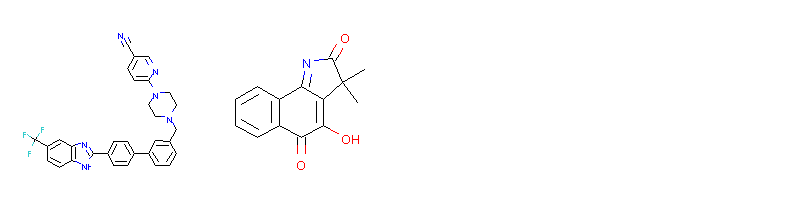

In [39]:
Draw.MolsToGridImage([molecules[i] for i in range(2)], molsPerRow = 4)

In [40]:
from rdkit.Chem import MACCSkeys

In [43]:
maccs_fps = [MACCSkeys.GenMACCSKeys(x) for x in molecules]

In [44]:
DataStructs.FingerprintSimilarity(maccs_fps[0], maccs_fps[1])

0.1917808219178082

In [50]:
fp1 = AllChem.GetMorganFingerprint(molecules[0], 2)
fp2 = AllChem.GetMorganFingerprint(molecules[1], 2)

In [48]:
DataStructs.DiceSimilarity(fp1, fp2)

0.18181818181818182

In [49]:
DataStructs.TanimotoSimilarity(fp1, fp2)

0.1

In [54]:
from rdkit.ML.Cluster import Butina

In [55]:
# calculate fingerprints
fps = []
samples = random.sample(molecules, 500)
for m in samples:
    fps.append(Chem.RDKFingerprint(m, maxPath = 5))
# generate distance matrix
dist_matrix = []
num_fps = len(fps)
for i in range(1, num_fps):
    similarities = DataStructs.BulkTanimotoSimilarity(fps[i], fps[:i])
    dist_matrix.extend([1-x for x in similarities])
# cluster
clusters = Butina.ClusterData(dist_matrix, num_fps, 0.5, isDistData = True)
print("number of clusters = ", len(clusters))
num_clust_g5 = len([c for c in clusters if len(c) > 5])
print('number of clusters with more than 5 compounds = ', num_clust_g5)

number of clusters =  241
number of clusters with more than 5 compounds =  17


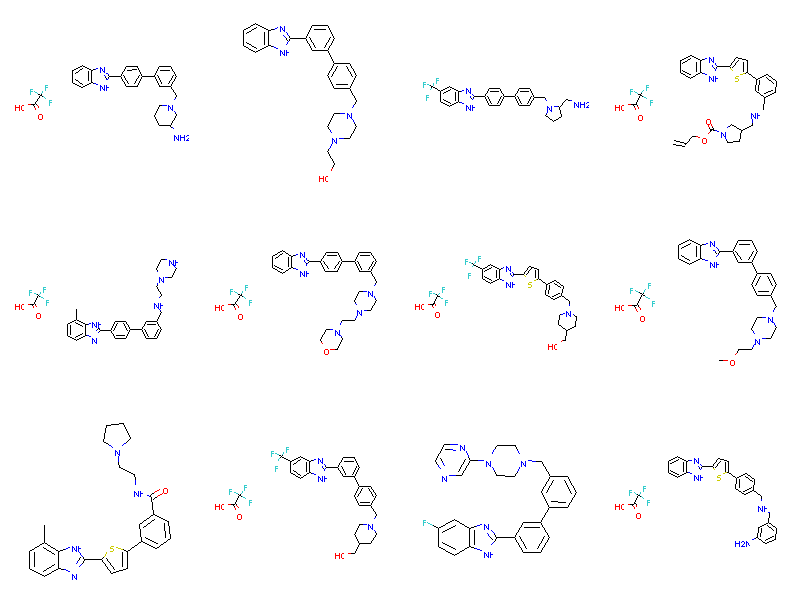

In [59]:
Draw.MolsToGridImage([samples[i] for i in clusters[0][:12]],
                    molsPerRow = 4)

C:\Users\us16120\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  """Entry point for launching an IPython kernel.
C:\Users\us16120\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  


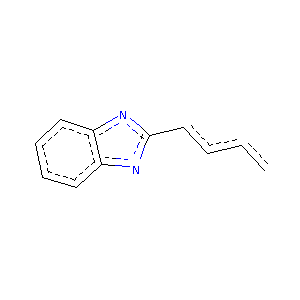

In [60]:
from rdkit.Chem import MCS
mcs = MCS.FindMCS([samples[i] for i in clusters[0]], threshold = 0.8)
m = Chem.MolFromSmarts(mcs.smarts)
Draw.MolToImage(m)